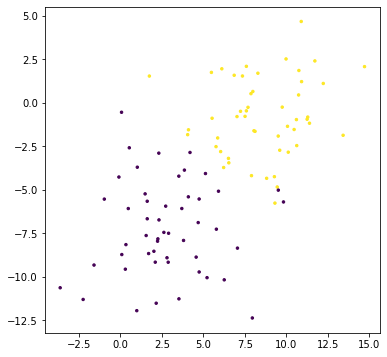

In [51]:
## Assignment 3
## Problem 1a - part 1: creating 50 pos. and 50 neg. 2d points

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

N = 100;

x, y = make_blobs(n_samples= N , n_features=2, centers=2, cluster_std=2.5, random_state=1000)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], c=y, s=6)
plt.show()

## This part is just adding the dummy variable to the beginning of each x element 
## and changing the values of y to -1 and 1 instead of 0 and 1
n = len(x_train)
x_train = np.c_[np.ones(n), x_train]
#print(x_train)

y_train[y_train == 0] = -1
#print(y_train)

n = len(x_test)
x_test = np.c_[np.ones(n), x_test]
#print(x_train)

y_test[y_test == 0] = -1
#print(y_train)

## I define some helper function to call when running through the perceptron algorithm. 
## First one predicts the value of y, from the weight and x element given.
## Second was to help me sum up all the elements that predicted a wron y value
## Third helped me get the error, similar to the sum function just multiplied by the wi
def y_prediction(x, w):
    return np.sign(x.dot(w))
    
    
def sum_Mk(M_k):
    dummy = 0
    for i in range(0,len(M_k),2):
        dummy = dummy + M_k[i][0]*M_k[i][1]
    
    return dummy

def error_rss(x, y, w):
    diff = y - y_prediction(x,w)
    return diff.T@diff
    


In [52]:
# Problem 1a - part 4
## Sequential Perceptron Algorithm

def seq(x,y,epoch, mu):
    w = np.array([0, 0, 0])
    k = 0
    
    RSS = []
    
    for k in range(epoch):
        
        for j in range(len(x)):
            M_k = []
            y_pred = y_prediction(x[j], w)
    
            if y_pred != y[j]: 
                M_k.append([x[j], y[j]])
                w = w + mu*x[j]*y[j]
        
        RSS.append(error_rss(x,y,w))
             
               

    return w, RSS




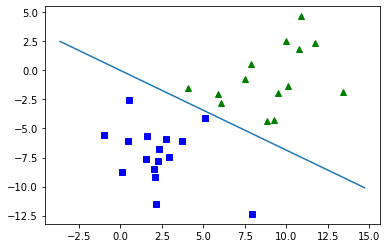

Accuracy:  1.0


In [53]:
## Problem 1a - part 5

## Plotting training data with predicted curve
w_seq = seq(x_test,y_test,100, 0.01)[0]
err = seq(x_test,y_test,100, 0.01)[1]
plt.plot(x_test[:, 1][y_test == 1], x_test[:, 2][y_test == 1], 'g^')
plt.plot(x_test[:, 1][y_test == -1], x_test[:, 2][y_test == -1], 'bs')

sp_xx = np.linspace(np.min(x_train[:,1]), np.max(x_train[:,1]))
sp_yy = (w_seq[1]*sp_xx + w_seq[0])/(-1*w_seq[2])
plt.plot(sp_xx, sp_yy)
plt.show()



y_pred = y_prediction(x_test,w_seq)
batch_acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', batch_acc)

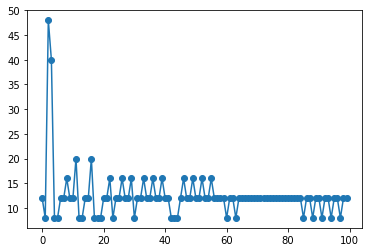

In [54]:
err_curve = seq(x_train,y_train,100, 0.01)[1]

iterations = np.arange(len(err_curve))

plt.plot(iterations, err_curve,'-o')
plt.show()
